In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from collections import Counter
import re

In [2]:
data = pd.read_csv('Restaurant Reviews.csv')
print(data.head())

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures    7514  
0   1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN  
3    1 Review , 1 Follower  5/24/2019 22:11         0     NaN  
4  3 Reviews , 2 Followers  5/24/201

In [3]:
data.drop(columns=['7514'], inplace=True)
print(data.head())
print(data.describe())
print(data.info())
print(data.shape)

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0  
           Pictures


In [4]:
# extract from metadata
data[['Review_Count', 'Follower_Count']] = data['Metadata'].str.extract(r'(\d+) Review.*?(\d+)? Follower')
data['Review_Count'] = pd.to_numeric(data['Review_Count'], errors='coerce').fillna(0)
data['Follower_Count'] = pd.to_numeric(data['Follower_Count'], errors='coerce').fillna(0)
data.drop(columns=["Metadata"], inplace=True)

In [5]:
print(data["Rating"].unique())
print(data["Rating"].isnull().sum())
print((data["Rating"] == "Like").sum())
print(data["Rating"].isna().sum())

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]
38
1
38


In [6]:
data["Rating"] = pd.to_numeric(data["Rating"], errors="coerce")
data["Rating"].fillna(data["Rating"].median(), inplace=True)
print(data["Rating"].unique()) 
print(data["Rating"].isnull().sum())

[5.  4.  1.  3.  2.  3.5 4.5 2.5 1.5]
0


In [15]:
# print(data.head)
print(data.isnull().sum()) 

Restaurant         0
Reviewer          38
Review            45
Rating             0
Time              38
Pictures           0
Review_Count       0
Follower_Count     0
Review_Length      0
dtype: int64


In [ ]:
data['Reviewer'].fillna("Unknown", inplace=True)
data['Time'].fillna(data['Time'].mode()[0], inplace=True) 
data['Review'].fillna("", inplace=True)

100
                       Restaurant  Avg_Rating  Num_Ratings
0               10 Downing Street        3.80          100
1                        13 Dhaba        3.48          100
2  3B's - Buddies, Bar & Barbecue        4.76          100
3       AB's - Absolute Barbecues        4.88          100
4               Absolute Sizzlers        3.62          100


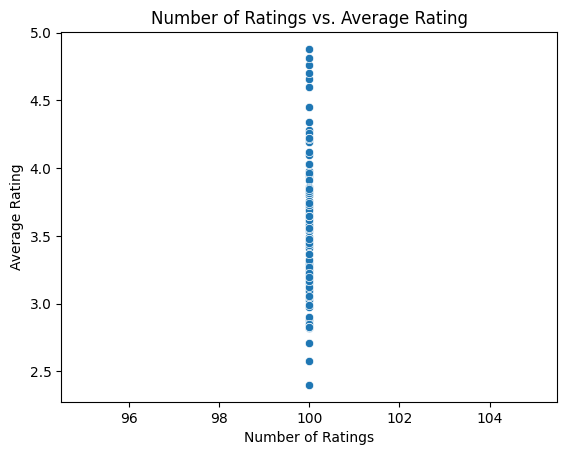

In [16]:
print(data['Restaurant'].nunique())

avg_ratings = data.groupby('Restaurant').agg(
    Avg_Rating=('Rating', 'mean'),
    Num_Ratings=('Rating', 'count')
).reset_index()

print(avg_ratings.head())

# Relationship Between Number of Reviews & Average Rating
sns.scatterplot(x=avg_ratings['Num_Ratings'], y=avg_ratings['Avg_Rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Number of Ratings vs. Average Rating')
plt.show()

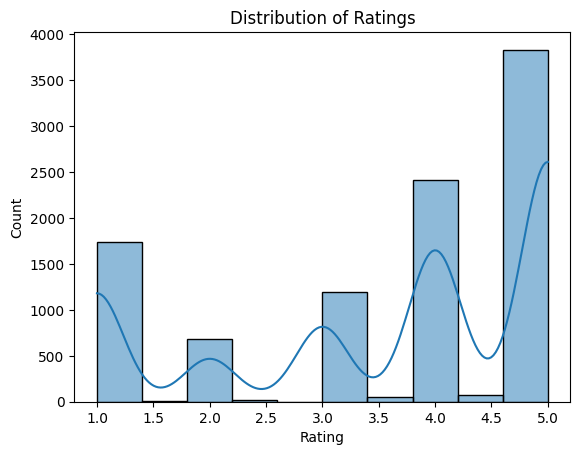

In [17]:
# Distribution of Ratings
sns.histplot(data['Rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

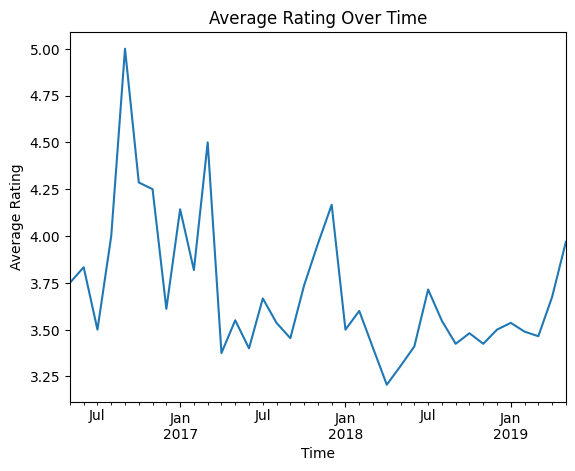

In [18]:
# review trends over time
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data.set_index('Time')['Rating'].resample('M').mean().plot()
plt.title('Average Rating Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Time')
plt.show()

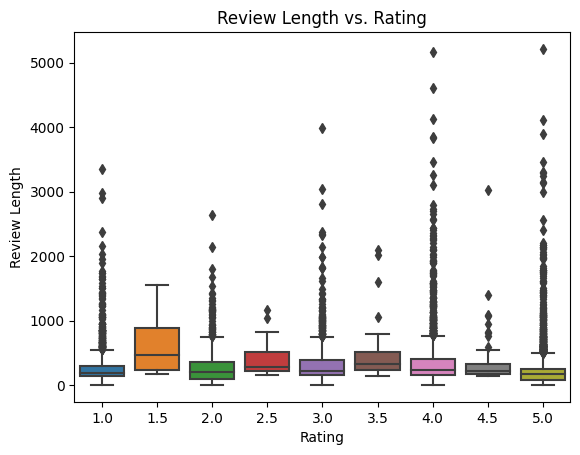

In [19]:
data['Review_Length'] = data['Review'].apply(lambda x: len(str(x)))
sns.boxplot(x=data['Rating'], y=data['Review_Length'])
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title('Review Length vs. Rating')
plt.show()


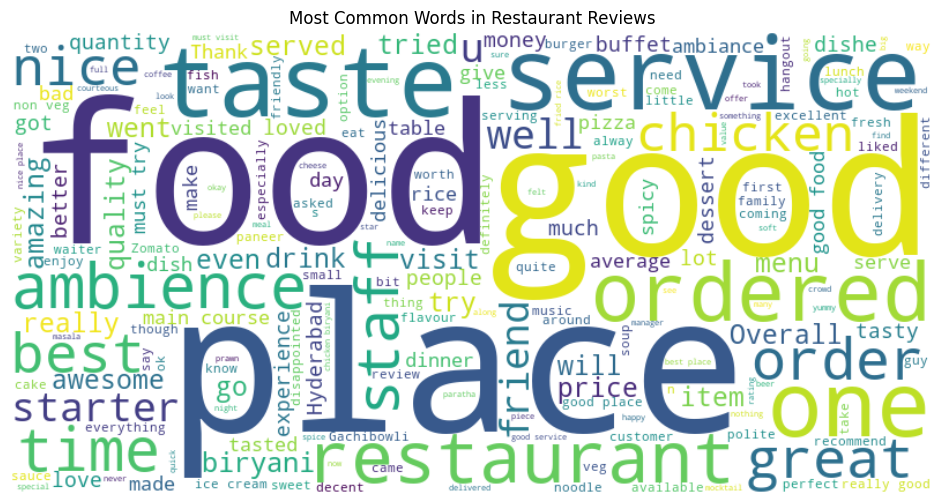

[('the', 23291), ('and', 17638), ('was', 10320), ('to', 9905), ('a', 9758), ('is', 9253), ('i', 8036), ('of', 7459), ('good', 7230), ('it', 7008), ('food', 6641), ('for', 6566), ('place', 5734), ('with', 5509), ('in', 5276), ('this', 4833), ('we', 4101), ('very', 3734), ('not', 3651), ('they', 3521)]


In [20]:
# wordcloud of reviews 7 most common words in reviews
all_reviews = " ".join(review for review in data["Review"].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis",
                      max_words=200, contour_color="black").generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Common Words in Restaurant Reviews")
plt.show()

all_reviews = re.findall(r'\b\w+\b', all_reviews.lower())
word_freq = Counter(all_reviews)
print(word_freq.most_common(20))

In [21]:
# Top 10 highest-rated restaurants
top_restaurants = data.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Highest Rated Restaurants:\n", top_restaurants)

# Bottom 10 lowest-rated restaurants
worst_restaurants = data.groupby('Restaurant')['Rating'].mean().sort_values(ascending=True).head(10)
print("Bottom 10 Lowest Rated Restaurants:\n", worst_restaurants)

Top 10 Highest Rated Restaurants:
 Restaurant
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Rating, dtype: float64
Bottom 10 Lowest Rated Restaurants:
 Restaurant
Hotel Zara Hi-Fi                         2.400
Asian Meal Box                           2.580
Pakwaan Grand                            2.710
Mathura Vilas                            2.820
Behrouz Biryani                          2.825
Shree Santosh Dhaba Family Restaurant    2.830
The Chocolate Room                       2.830
KFC                                      2.850
Club Rogue           

In [22]:
data.to_csv("explored_data.csv", index=False)